Задание на практику.

1. Изучить блокнот.
1. Повторить на других изображениях.
1. Найти еще не менее 3х фильтров, которые применяются для работы с изображениями.
1. Применить найденные фильтры, добавить описание фильтров.

In [ ]:
from scipy import ndimage
import matplotlib.pyplot as plt
import imageio
import PIL
import numpy as np
import cv2
import skimage

In [ ]:
import cv2

Чтение файла:

In [ ]:
image = cv2.imread("orig.png")


## Фильтр номер 1: Сепия

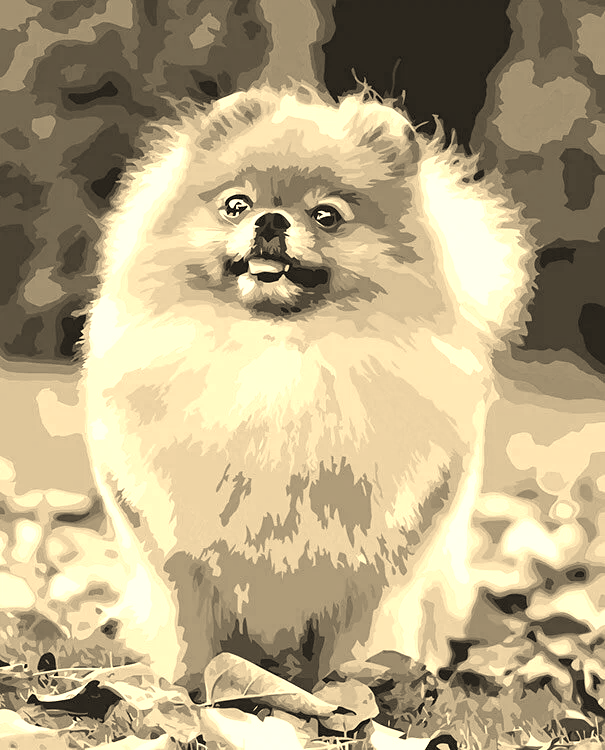

In [ ]:
def apply_sepia(image):
    kernel = np.array([[0.272, 0.534, 0.131], #матрица 3 на 3. Каждое значение в матрице определяет, как интенсивность каждого цветового канала (красного, зеленого и синего) будет преобразована.
                       [0.349, 0.686, 0.168],
                       [0.393, 0.769, 0.189]])
    sepia_image = cv2.transform(image, kernel)
    sepia_image = np.clip(sepia_image, 0, 255) # ограничивает значения пикселей в диапазоне от 0 до 255, чтобы убедиться, что они остаются допустимыми для изображения.
    return sepia_image

sepia_image = apply_sepia(image)
cv2_imshow(sepia_image)


## Фильтр номер 2: инверсия цветов

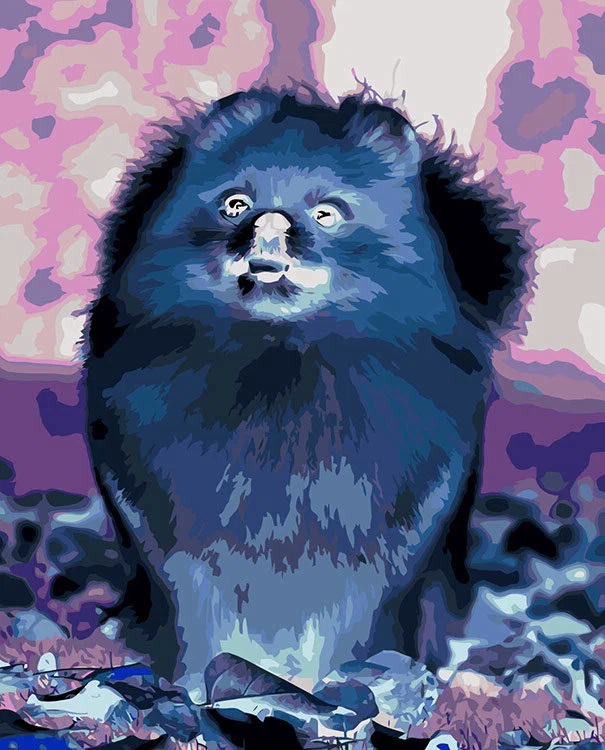

In [ ]:
def invert_colors(image):
    inverted_image = cv2.bitwise_not(image) #выполняет побитовое отрицание каждого пикселя изображения. Это означает, что каждый цветовой канал (красный, зеленый и синий) инвертируется: значение 0 становится 255, 255 становится 0, и так далее. В результате создается изображение с инвертированными цветами.
    return inverted_image

inverted_image = invert_colors(image)
cv2_imshow(inverted_image)


## Фильтр номер 3: измнение яркости

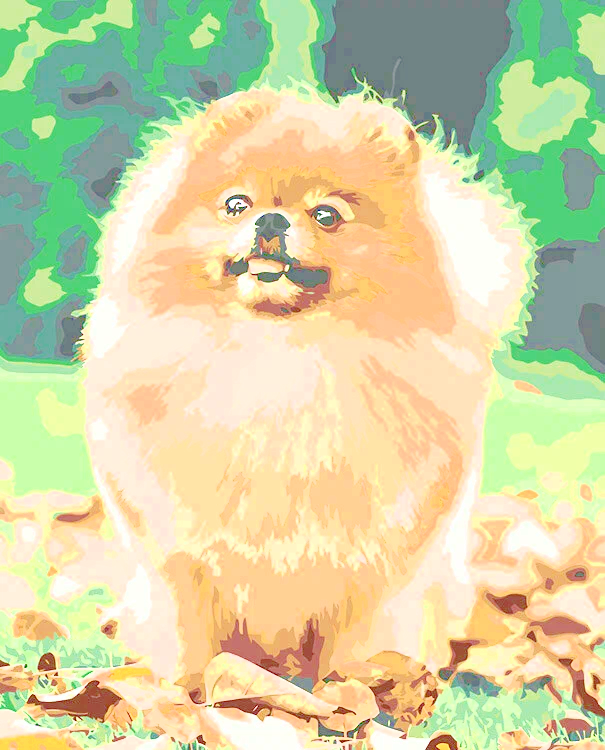

In [ ]:
def adjust_brightness(image, value=100):
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv)
    v = cv2.add(v, value)
    v[v > 255] = 255
    v[v < 0] = 0
    final_hsv = cv2.merge((h, s, v))
    bright_image = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)
    return bright_image

bright_image = adjust_brightness(image)
cv2_imshow(bright_image)


## Фильтр номер 4: виньетка

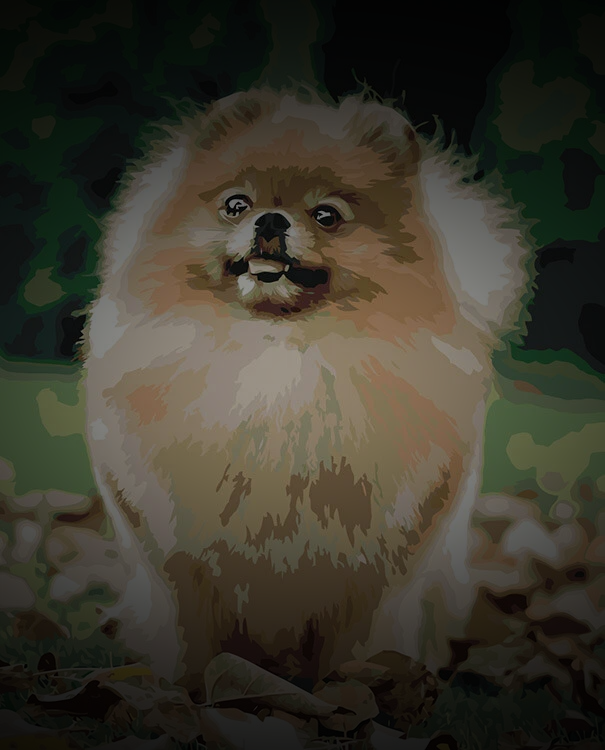

In [ ]:
def vignette_filter(image):
    rows, cols = image.shape[:2]
    kernel_x = cv2.getGaussianKernel(cols, 300)
    kernel_y = cv2.getGaussianKernel(rows, 200)
    kernel = kernel_y * kernel_x.T
    mask = 255 * kernel / np.linalg.norm(kernel)
    vignette_image = np.copy(image)
    for i in range(3):
        vignette_image[:, :, i] = vignette_image[:, :, i] * mask
    return vignette_image

vignette_image = vignette_filter(image)
cv2_imshow(vignette_image)
